# Backpropagation

In this notebook, we will implement the backpropagation procedure for a two-node network. We'll start by implementing each step of the backpropagation procedure, and then combine these steps together to create a complete backpropagation algorithm.

##  Preliminaries
Text preceded by a `#` indicates a 'comment'.  I will use comments to explain what we're doing and to ask you questions.  Also, comments are useful in your own code to note what you've done (so it makes sense when you return to the code in the future).  It's a good habit to *always* comment your code.  I'll try to set a good example, but won't always . . . 

Before beginning, let's load in the Python packages we'll need:

In [1]:
from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3)                # Change the default figure size

##  Steps to backpropagation

We outlined 4 steps to perform backpropagation,

   1. Choose random initial weights.
   2. Fix input at desired value, and calculate output.
   3. Update the weights.
   4. Repeat steps 2 & 3 many times.

Let's now implement these steps.

## Step 1. Choose random initial weights.
  This step is easy. We need to choose the three initial weights in our
  2-node model.  We can choose these weights to be anything we like,
  within reason.  Let's set:

In [2]:
w0 = 2
w1 = 1
w2 = 0.5

<div class="question">
    
**Q:**  Why choose these weights?

</div>

Then, in backpropagation, we'll update these weights so that our neural
network - when given a specific input - produces a desired output.

## Step 2.  Fix input at desired value, and calculate output. 
  Our next step is to choose an input, send this input to our neural
  network, and compute the output.  This is called the *feedforward
  solution*; we're "feeding" our neural network the input, sending this
  input "forward" through the network, and returning the output.

  Let's start by choosing an input,

In [3]:
s0 = 2

  Then, we need to send this input through our network. We'll do this in
  multiple steps.  First, let's compute the activity of the first neuron:

In [4]:
x1 = w0*s0

  Then, to determine the output of the first neuron, we need to send this
  activity through a sigmoid function.  To do that, we first need to
  *define* the sigmoid function ... Let's do so here in Python,

In [5]:
def sigmoid(x):
    return 1/(1+exp(-x))

  This function takes one input (`x`), and returns one output equal to the numerical
  value of the sigmoid function at that value of `x`. For example, to
  compute the value of the sigmoid function at `x=0.5`, and save this output
  in a variable `s`, we execute the following command,

In [6]:
s = sigmoid(0.5)
print(s)

0.6224593312018546


Now we're able to compute the output of our first neuron,

In [7]:
s1 = sigmoid(x1)

We can ontinue our feedforward computation to determine the output of our neural network.

In [8]:
x2 = w1*s1
s2 = sigmoid(x2)
out = w2*s2
print(out)

0.36375380675182073


## Step 3.  Update the weights.
 To update the weights, we'll use the expressions we derived in class 
 for the updated values of `w0` and `w1`.  Let's write those here ...

 But first, remember that to compute the weight update, we need to define
 a learning rate,

In [9]:
alpha  = 0.1    #Here we'll set the learning rate to 0.1.

And we also need to define a target value we would like our neural network to produce as output,

In [10]:
target = 0.7

Then, let's define two weight updates,

In [11]:
w2 = w2 - alpha*(out-target)*s2
w1 = w1 - alpha*(out-target)*(w2*s2*(1-s2)*s1)

<div class="question">

**Q:**  Do these two expressions match the equations for the weight updates we derived in class?  HINT: They should!

</div>

We need one more expression, to update the last weight, w0.

In [12]:
w0 = '????????'  # <-- Fill in the proper expression

<div class="question">

**Q:** What is the expression for `w0` in the equation above?

</div>

## Step 4.  Repeat steps 2 & 3 many times.
 Now, we'd like to repeat Steps 2 & 3 many times. In doing so, we'll
 perform gradient descent, and move (slowly) down our cost function,
 until we reach a minimum.

 We could try to compute these repetitions by hand, for example by repeating
 the cells above. To do so, we'd need to take the new weights we just
 found in Step 3, compute the feedforward solution to our neural network,
 and then update the neural network's weights (which depends on how close
 our neural network's output is to the target value).

 But, we want to evaluate this procedure 1000 times. We could do this by
 hand, but it'd be a total pain, and highly error prone. Instead, let's
 ask a computer to do the boring work of multiple repetitions. To do so,
 let's collect the code above, and repeat it 1000 times. We'll wrap our
 code above inside a `for-loop` to make this efficient,

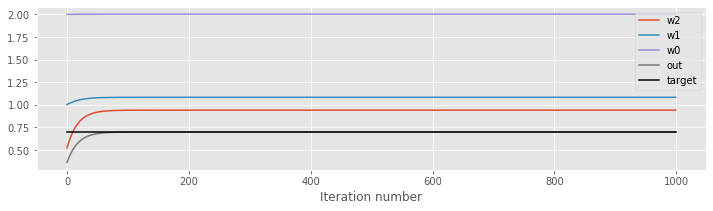

In [13]:
s0 = 2                          # Define the input,
target = 0.7                    # ... and the target output.

w0 = 2                          # Choose initial values for the weights.
w1 = 1
w2 = 0.5

alpha = 0.1                     # Set the learning constant.

def sigmoid(x):
    return 1/(1+exp(-x))     # Define the sigmoid anonymous function.

results = zeros([1000,4])    # Define a variable to hold the results of each iteration.    
for k in range(1000):           # For 1000 iteractions,
    
    #Step 2. Calculate feedforward solution to get output.
    x1 = w0*s0                  # ... activity of first neuron,
    s1 = sigmoid(x1)            # ... output of first neuron,
    x2 = w1*s1                  # ... activity of second neuron,
    s2 = sigmoid(x2)            # ... output of second neuron,
    out= w2*s2                  # Output of neural network.
    
    #Step 3. Update the weights.
    w2 = w2 - alpha*(out-target)*s2
    w1 = w1 - alpha*(out-target)*(w2*s2*(1-s2)*s1)
    w0 = w0 - alpha*(out-target)*(w2*s2*(1-s2)*w1)*(s1*(1-s1)*s0)
    
    # Save the results of this step! --------------------------------------
    results[k,:] = [w2,w1,w0,  out]
    # Here we save the 3 weights, the neural network output.

clf()
plot(results[:,0], label='w2')
plot(results[:,1], label='w1')
plot(results[:,2], label='w0')
plot(results[:,3], label='out')
plot(arange(1000), 1000*[target], 'k', label='target')  #... and plot the *target*.
legend() #Iclude a legend,
xlabel('Iteration number');         #... and axis label.

<a id="donate"></a>
## Donate
If you enjoy Case-Studies-Python, and would like to share your enjoyment with us, sponsor our coffee consuption <a href="https://www.paypal.com/donate/?hosted_button_id=DL8P5ZGS9962U">here</a>.